In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio 

# 1

In [3]:
fa = 1e3
fb = 2e3
fs = 1/8e3

t = np.arange(0, 5 + fs, fs)
f = fa + t*(fb - fa)
x = np.sin(2*np.pi * f * t)

Audio(data=x, rate=1/fs, autoplay=False)

# 2

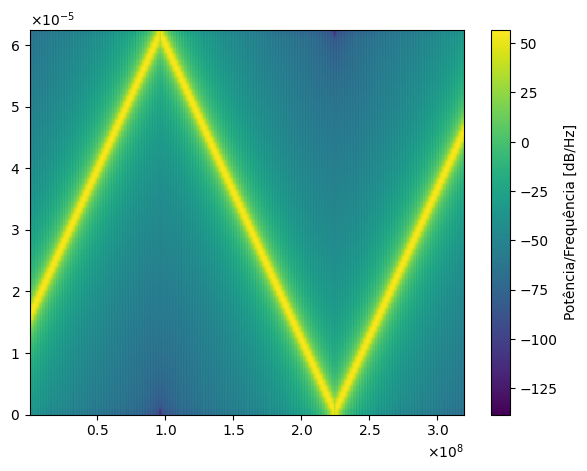

In [4]:
f, ax = plt.subplots(figsize=(7, 5))

spectrograma = ax.specgram(x=x, NFFT=128, noverlap=120, Fs=fs)

f.colorbar(spectrograma[3], label='Potência/Frequência [dB/Hz]')

ax.ticklabel_format(style='sci', scilimits=(0,0), useMathText=True)

plt.show()

# 4

In [5]:
y = x[::2]

Audio(data=y, rate=1/fs, autoplay=False)

# 5 

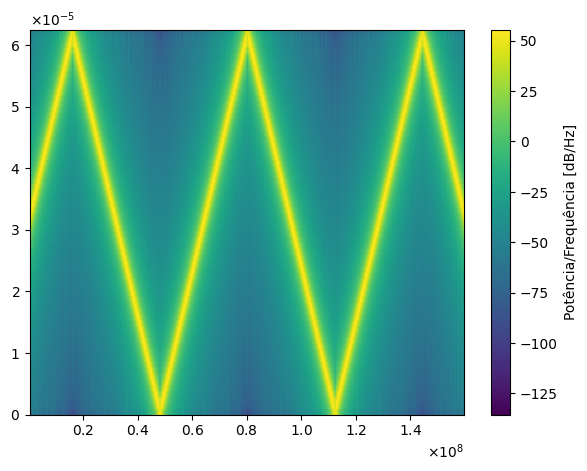

In [6]:
f, ax = plt.subplots(figsize=(7, 5))

spectrograma = ax.specgram(x=y, NFFT=128, noverlap=120, Fs=fs)

f.colorbar(spectrograma[3], label='Potência/Frequência [dB/Hz]')

ax.ticklabel_format(style='sci', scilimits=(0, 0), useMathText=True)

plt.show()


# 6

In [7]:
fs, vogais = wavfile.read('./vogais.wav')

x = vogais[:,1]

Audio(data=x, rate=fs, autoplay=False,)


# 8

In [8]:
Audio(data=x, rate=(fs/2), autoplay=False,)

# 9

In [9]:
b = signal.firwin(100, 0.1)
a = 1
x_filtrado  = signal.lfilter(b, a, x)

Audio(data=x_filtrado, rate=fs/2, autoplay=False)

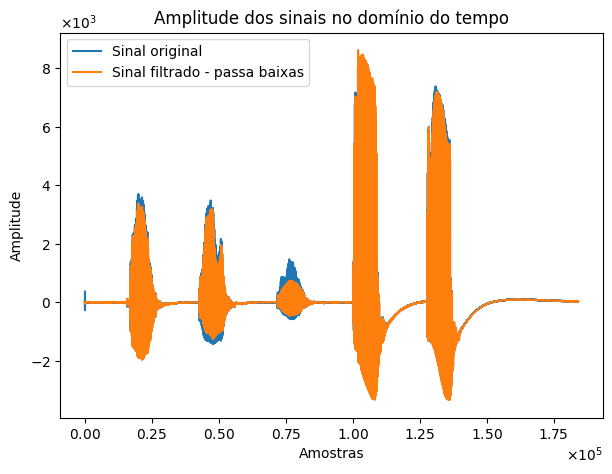

In [14]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(x, label='Sinal original')
ax.plot(x_filtrado, label='Sinal filtrado - passa baixas')

ax.legend()

ax.ticklabel_format(style='sci', scilimits=(0,0), useMathText=True)

ax.set(
  title='Amplitude dos sinais no domínio do tempo',
  xlabel='Amostras',
  ylabel='Amplitude'
)

f.savefig('sinais.pdf')
plt.show()

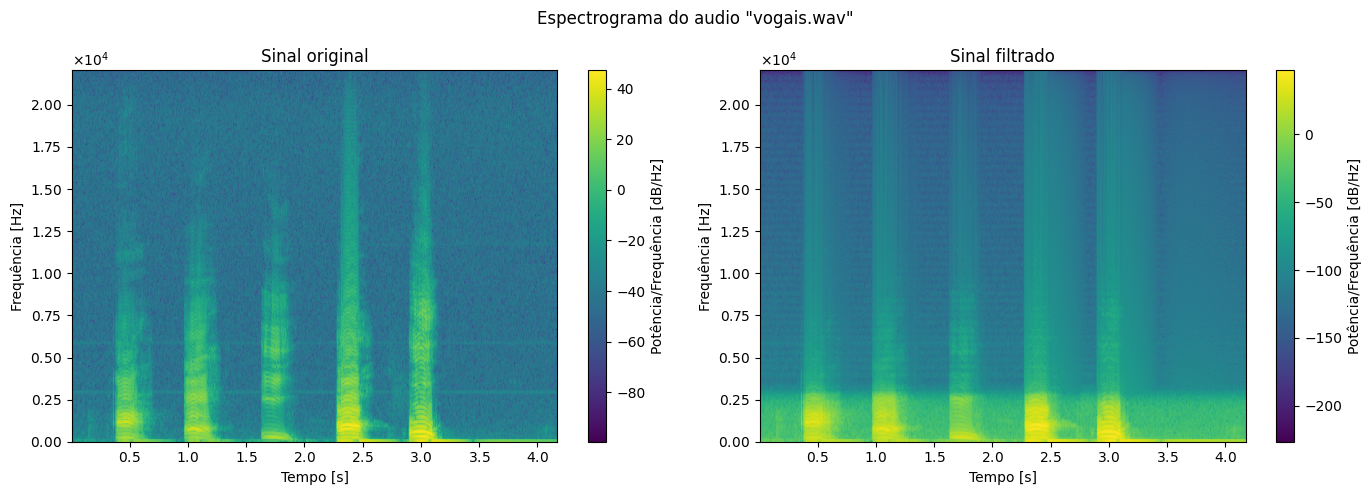

In [36]:
f, ax = plt.subplots(ncols=2, figsize=(14, 5), sharex=True)

spectrograma_0 = ax[0].specgram(x=x, NFFT=512, noverlap=240, Fs=fs)
spectrograma_1 = ax[1].specgram(x=x_filtrado, NFFT=512, noverlap=240, Fs=fs)

f.colorbar(spectrograma_0[3], label='Potência/Frequência [dB/Hz]')
f.colorbar(spectrograma_1[3], label='Potência/Frequência [dB/Hz]')

ax[0].set_title('Sinal original')
ax[1].set_title('Sinal filtrado')

for ax in ax.flat:
  ax.ticklabel_format(style='sci', scilimits=(0, 0), useMathText=True)
  ax.set(
    xlabel='Tempo [s]',
    ylabel='Frequência [Hz]'
  )

f.suptitle('Espectrograma do audio "vogais.wav"')

f.tight_layout()
f.savefig('espec_vogais.pdf')

# f.colorbar(spectrograma[3], label='Potência/Frequência [dB/Hz]')

# ax.ticklabel_format(style='sci', scilimits=(0, 0), useMathText=True)

plt.show()
